<a href="https://colab.research.google.com/github/jwojcikow127/Python_For_Machine_Learning/blob/main/Python_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_validate
import itertools
from sklearn.model_selection import GridSearchCV


Dataset import

In [5]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Billionaires Statistics Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Split data into training and testing subset

In [6]:
train, test = train_test_split(data, test_size=0.3, random_state=1)

Creating correlation heatmap

<ipython-input-7-4da33a2e5e5a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['gdp_country'] = new_data['gdp_country'].str.replace(',','')
<ipython-input-7-4da33a2e5e5a>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data['gdp_country'] = new_data['gdp_country'].str.replace('$','')
<ipython-input-7-4da33a2e5e5a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

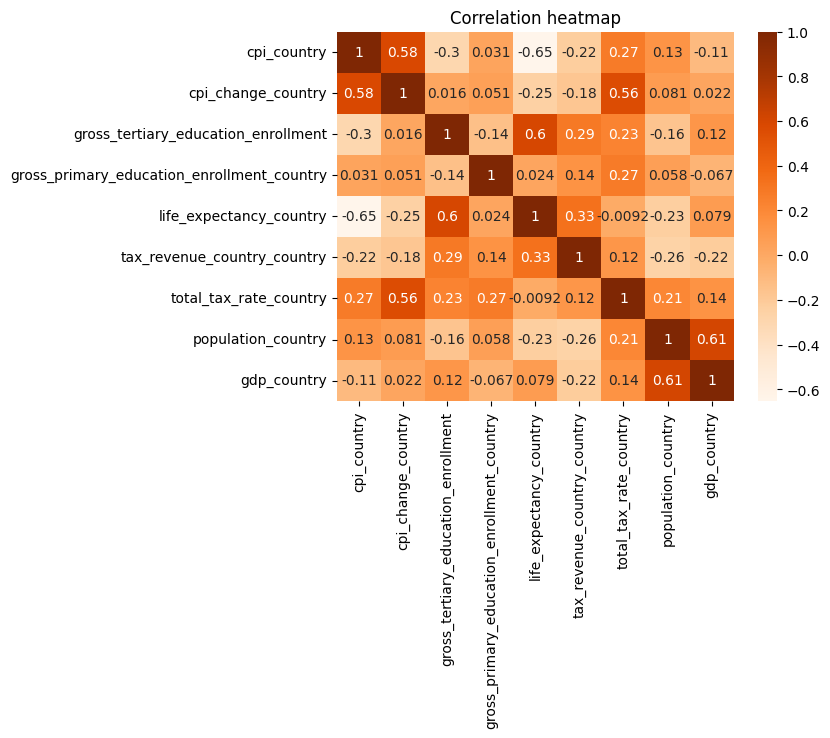

In [7]:
#cleaning dataset for training subset
columns = [ 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country','life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'gdp_country' ]
data = train[columns]

data = data.drop_duplicates()
new_data = data.dropna()

#changing string value into numerical to compare in heatmap
new_data['gdp_country'] = new_data['gdp_country'].str.replace(',','')
new_data['gdp_country'] = new_data['gdp_country'].str.replace('$','')
new_data['gdp_country'] = new_data['gdp_country'].astype(int)
new_data['gdp_country'] = new_data['gdp_country']/1000000000 #in billions

corr1 = new_data.corr()
sns.heatmap(corr1, annot=True, cmap='Oranges').set(title='Correlation heatmap')

#cleaning dataset for testing subset
columns = [ 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment', 'life_expectancy_country', 'population_country' ]   #choosen features
test_data = test[columns]

test_data = test_data.drop_duplicates()
test_data = test_data.dropna()

Checking correlation between choosed features

[Text(0.5, 1.0, 'Features correlation heatmap')]

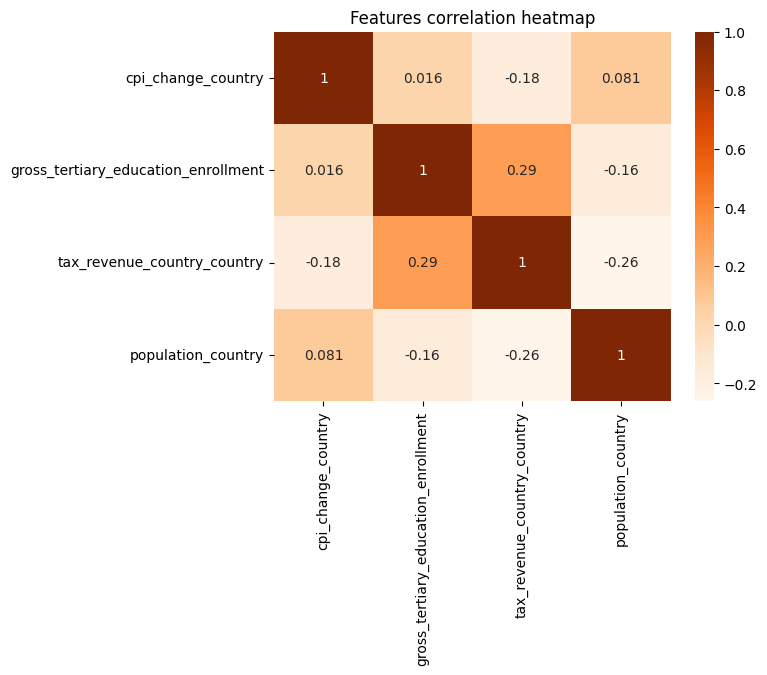

In [8]:
columns2 = [ 'cpi_change_country','gross_tertiary_education_enrollment', 'tax_revenue_country_country', 'population_country']
correlated_features = new_data[columns2]

corr2 = correlated_features.corr()
sns.heatmap(corr2, annot=True, cmap='Oranges').set(title='Features correlation heatmap')

Summary:
To train the first model we will be using:
*   cpi_country

To train the second model we will use:
*   gross_tertiary_education_enrollment (biggest corr with life expectancy after cpi_country)
*   population_country (not correlated with with gross_tertiary_education_enrollment)
*   cpi_change_country

Preparing first model data

In [92]:
standard_scaler = StandardScaler().set_output(transform="pandas")

train_X_1 = new_data['cpi_country']
train_Y_1 = new_data['life_expectancy_country']

print(train_Y_1.size)
#split from training to training and valid
train_X_1, valid_X_1 = train_test_split(train_X_1, test_size=0.2, random_state=1)
train_Y_1, valid_Y_1 = train_test_split(train_Y_1, test_size = 0.2, random_state = 1 )

#converting pandas to numpy (for model training requirements)
train_X_1_nump = train_X_1.to_numpy()
valid_X_1_nump = valid_X_1.to_numpy()
train_X_1_nump = train_X_1_nump.reshape(-1,1)
valid_X_1_nump = valid_X_1_nump.reshape(-1,1)

train_Y_1_nump = train_Y_1.to_numpy()
valid_Y_1_nump = valid_Y_1.to_numpy()
train_Y_1_nump = train_Y_1_nump.reshape(-1,1)
valid_Y_1_nump = valid_Y_1_nump.reshape(-1,1)

#standarization model 1 subsets: train and valid
train_X_1_nump = standard_scaler.fit_transform(train_X_1_nump)
valid_X_1_nump = standard_scaler.fit_transform(valid_X_1_nump)
#we are not standariznig output data (Y)

#prepering test subset for model 1
test_X_1 = test_data['cpi_country']
test_Y_1 = test_data['life_expectancy_country']

#converting pandas to numpy (for model testing requirements)
test_X_1_nump = test_X_1.to_numpy()
test_X_1_nump = test_X_1_nump.reshape(-1,1)
test_Y_1_nump = test_Y_1.to_numpy()
test_Y_1_nump = test_Y_1_nump.reshape(-1,1)

#standarization model 1 subsets: test
test_X_1_nump = standard_scaler.fit_transform(test_X_1_nump)

61


Preparing second model data

In [10]:
#choosen features for 2nd model
columns3 = [ 'cpi_change_country','gross_tertiary_education_enrollment', 'population_country']
train_X_2 = new_data[columns3]
train_Y_2 = new_data['life_expectancy_country']

#split from training to training and valid
train_X_2, valid_X_2 = train_test_split(train_X_2, test_size=0.2, random_state=1)
train_Y_2, valid_Y_2 = train_test_split(train_Y_2, test_size = 0.2, random_state = 1 )

#for second model we dont need to convert pandas to numpy

#standarization model 2 subsets: train and valid
train_X_2 = standard_scaler.fit_transform(train_X_2)
valid_X_2 = standard_scaler.fit_transform(valid_X_2)

#prepering test subset for model 2
test_X_2 = test_data[columns3]
test_Y_2 = test_data['life_expectancy_country']

#standarization model 2 subset: test
test_X_2 = standard_scaler.fit_transform(test_X_2)

**Finding best model**

*Model 1*

Model 1 - Linear regression

In [11]:
reg_1 = LinearRegression()
reg_1.fit(train_X_1_nump, train_Y_1_nump)

y_pred_train = reg_1.predict(train_X_1_nump)
y_pred = reg_1.predict(valid_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_1_nump)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
4.397197460670821
rmse validation error
2.056648969737778


Model 1 - MLP

In [12]:
reg = MLPRegressor(hidden_layer_sizes=(2,2), random_state=1, max_iter=500)
reg.fit(train_X_1_nump, train_Y_1_nump)
y_pred_train = reg.predict(train_X_1_nump)
y_pred = reg.predict(valid_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_1_nump)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
77.00275055021467
rmse validation error
77.18854368445426


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 1 - SVM - linear


In [13]:
reg = svm.SVR(kernel='linear')
reg.fit(train_X_1_nump, train_Y_1_nump)

y_pred_train = reg.predict(train_X_1_nump)
y_pred = reg.predict(valid_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_1_nump)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
6.567421774512921
rmse validation error
5.271406346098699


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model 1 - SVM - poly

In [14]:
reg = svm.SVR(kernel='poly', degree = 3)
reg.fit(train_X_1_nump, train_Y_1_nump)

y_pred_train = reg.predict(train_X_1_nump)
y_pred = reg.predict(valid_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_1_nump)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
6.073004931374596
rmse validation error
4.634049017358784


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model 1 - SVM - Sigmoid

In [15]:
reg = svm.SVR(kernel='sigmoid')
reg.fit(train_X_1_nump, train_Y_1_nump)

y_pred_train = reg.predict(train_X_1_nump)
y_pred = reg.predict(valid_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_1_nump)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
6.732416999832008
rmse validation error
5.539608140217575


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model 1 - SVM - RBF

In [16]:
reg = svm.SVR(kernel='rbf')
reg.fit(train_X_1_nump, train_Y_1_nump)

y_pred_train = reg.predict(train_X_1_nump)
y_pred = reg.predict(valid_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_1_nump)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
6.519100956677488
rmse validation error
5.00383326607806


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Model 2*

Model 2 - linear regression

In [17]:
reg_2 = LinearRegression()
reg_2.fit(train_X_2, train_Y_2)

y_pred_train = reg_2.predict(train_X_2)
y_pred = reg_2.predict(valid_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_2)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
4.1056087092688776
rmse validation error
3.6167727830374066


Model 2 - MLP

In [18]:
reg = MLPRegressor(hidden_layer_sizes=(2,2), random_state=1, max_iter=500)
reg.fit(train_X_2, train_Y_2)
y_pred_train = reg.predict(train_X_2)
y_pred = reg.predict(valid_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_2)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
73.69741788990233
rmse validation error
73.41455215157602


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 2 - SVM - linear

In [19]:
reg = svm.SVR(kernel='linear')
reg.fit(train_X_2, train_Y_2)

y_pred_train = reg.predict(train_X_2)
y_pred = reg.predict(valid_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_2)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
4.187044654032199
rmse validation error
3.6704953666951012


Model 2 - SVM - poly

In [20]:
reg = svm.SVR(kernel='poly', degree = 3)
reg.fit(train_X_2, train_Y_2)

y_pred_train = reg.predict(train_X_2)
y_pred = reg.predict(valid_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_2)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
5.011027314420306
rmse validation error
3.6386939092929733


Model 2 - SVM - Sigmoid


In [21]:
reg = svm.SVR(kernel='sigmoid')
reg.fit(train_X_2, train_Y_2)

y_pred_train = reg.predict(train_X_2)
y_pred = reg.predict(valid_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_2)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
4.347074979684345
rmse validation error
3.594456353562687


Model 2 - SVM - RBF

In [22]:
reg = svm.SVR(kernel='rbf')
reg.fit(train_X_2, train_Y_2)

y_pred_train = reg.predict(train_X_2)
y_pred = reg.predict(valid_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_val = np.sqrt(np.mean((y_pred - valid_Y_2)**2))
print("rmse validation error")
print(rmse_val)

rmse training error
4.336700749158613
rmse validation error
3.8505136093495285


Optimalization of MLP with grid search - there are some chances that MLP will ghave small error after perfect parameter adjust

MODEL 1

In [27]:

train_val_X_1_nump = np.concatenate((train_X_1_nump,valid_X_1_nump),axis=0)
train_val_Y_1_nump = np.concatenate((train_Y_1_nump,valid_Y_1_nump),axis=0)


reg_1 = MLPRegressor()
parameters = {'hidden_layer_sizes':list(itertools.product((1,2,3,4,5), repeat=1)),
              'activation':['relu','identity','logistic','tanh'],
              'solver':['lbfgs', 'adam', 'sgd'],
              'learning_rate':['constant','adaptive'],
              'random_state':[1],
              'max_iter': [1000]}
grid_search = GridSearchCV(reg_1, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(train_val_X_1_nump, train_val_Y_1_nump)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
#print(grid_search.cv_results_) # to get all results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

{'activation': 'logistic', 'hidden_layer_sizes': (4,), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 1, 'solver': 'lbfgs'}
MLPRegressor(activation='logistic', hidden_layer_sizes=(4,), max_iter=1000,
             random_state=1, solver='lbfgs')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

MLPRegressor(activation='logistic', hidden_layer_sizes=(4,), max_iter=500,
             random_state=1, solver='lbfgs') - the best parameters from grid search for MLP -> MODEL 1

In [28]:
# print(grid_search.best_estimator_) # to get the best estimator
reg = MLPRegressor(activation='logistic', hidden_layer_sizes=(1),learning_rate = 'constant', max_iter=1000,
             random_state=1, solver='lbfgs')
reg.fit(train_val_X_1_nump, train_val_Y_1_nump)
y_pred_train = reg.predict(train_val_X_1_nump)
y_pred = reg.predict(test_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_val_Y_1_nump)**2))
print(rmse_train)
rmse_test = np.sqrt(np.mean((y_pred - test_Y_1_nump)**2))
print(rmse_test)

6.710739121308731
6.70320426325712


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Linear regression test - > MODEL 1


In [ ]:
reg_1 = LinearRegression()
reg_1.fit(train_val_X_1_nump, train_val_Y_1_nump)

y_pred_train = reg_1.predict(train_val_X_1_nump)
y_pred = reg_1.predict(test_X_1_nump)

rmse_train = np.sqrt(np.mean((y_pred_train - train_val_Y_1_nump)**2))
print("rmse training error")
print(rmse_train)
rmse_test = np.sqrt(np.mean((y_pred - test_Y_1_nump)**2))
print("rmse validation error")
print(rmse_test)

rmse training error
4.013984025041404
rmse validation error
4.135750103213637


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MODEL 2 -> Grid search

In [33]:
train_val_X_2 = pd.concat([train_X_2,valid_X_2])
train_val_Y_2 = pd.concat([train_Y_2,valid_Y_2])


reg_1 = MLPRegressor()
parameters = {'hidden_layer_sizes':list(itertools.product((1,2,3,4,5,6,7), repeat=1)),
              'activation':['relu','identity','logistic','tanh'],
              'solver':['lbfgs', 'adam', 'sgd'],
              'learning_rate':['constant','adaptive'],
              'random_state':[1],
              'max_iter': [1000]}
grid_search = GridSearchCV(reg_1, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(train_val_X_2, train_val_Y_2)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
#print(grid_search.cv_results_) # to get all results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

{'activation': 'relu', 'hidden_layer_sizes': (4,), 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 1, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(4,), max_iter=1000, random_state=1,
             solver='lbfgs')


# MODEL 2 -> TESTS A++





In [90]:
# print(grid_search.best_estimator_) # to get the best estimator
train_val_X_2 = pd.concat([train_X_2,valid_X_2])
train_val_Y_2 = pd.concat([train_Y_2,valid_Y_2])

reg = MLPRegressor(activation='logistic', hidden_layer_sizes=(8),learning_rate = 'constant', max_iter=86,
             random_state=1, solver='lbfgs')
reg.fit(train_val_X_2, train_val_Y_2)
y_pred_train = reg.predict(train_val_X_2)
y_pred = reg.predict(test_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_val_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_test = np.sqrt(np.mean((y_pred - test_Y_2)**2))
print("rmse test error")
print(rmse_test)

rmse training error
1.9198017529042142
rmse test error
2.159304005732098


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
reg_1 = LinearRegression()
reg_1.fit(train_val_X_2, train_val_Y_2)

y_pred_train = reg_1.predict(train_val_X_2)
y_pred = reg_1.predict(test_X_2)

rmse_train = np.sqrt(np.mean((y_pred_train - train_val_Y_2)**2))
print("rmse training error")
print(rmse_train)
rmse_test = np.sqrt(np.mean((y_pred - test_Y_2)**2))
print("rmse test error")
print(rmse_test)

rmse training error
3.9921847236918513
rmse test error
4.170834226963408
